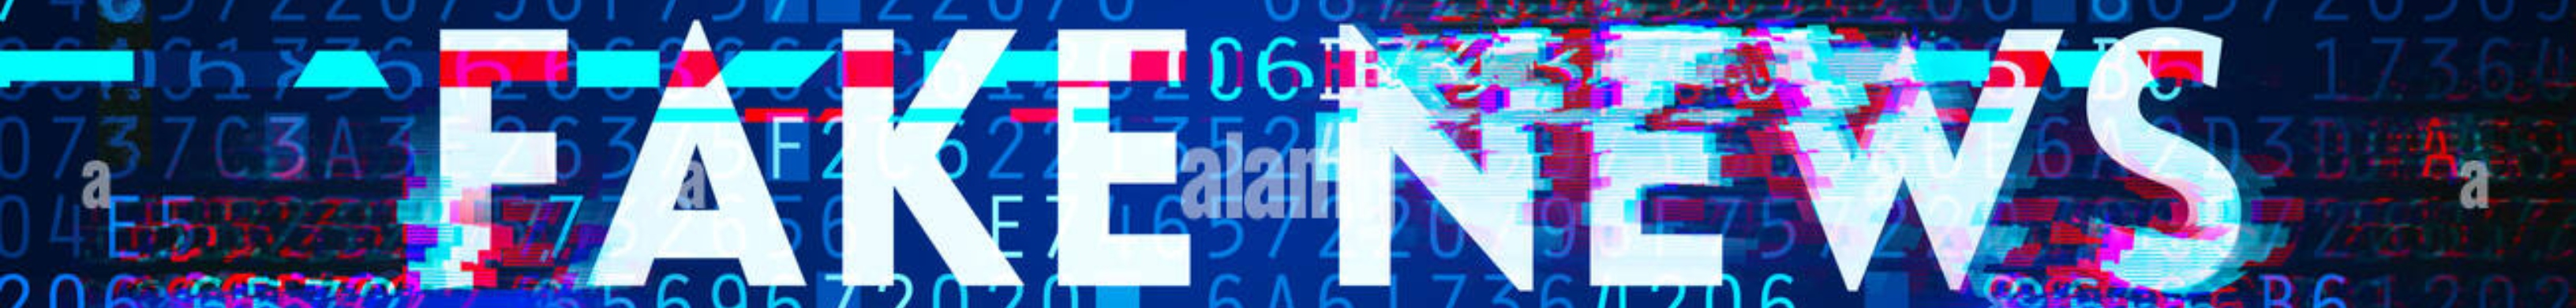

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from simple_colors import *

In [2]:
data = pd.read_csv('news data.csv')

In [3]:
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
df = data.copy()

***

# <span style='background :#10e2ee' > Data Preprocessing </span>
- Removing the Null values
- Adding a new field
- Drop features that are not needed
- Text Processing

#### <span style='background :#10e2ee' > Removing the Null values </span>

In [5]:
df.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [6]:
df['Body'] = df['Body'].fillna('')

In [7]:
df.isnull().sum()

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

#### <span style='background :#10e2ee' > Adding a new field </span>

In [8]:
df['News'] = df['Headline'] + df['Body']

In [9]:
df.head()

,URLs,Headline,Body,Label,News
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,Four ways Bob Corker skewered Donald TrumpImag...
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,Linklater's war veteran comedy speaks to moder...
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,Jason Aldean opens 'SNL' with Vegas tributeCou...


#### <span style='background :#10e2ee' > Drop features that are not needed </span>

In [10]:
useless_cols = ['URLs', 'Headline', 'Body']
df = df.drop(useless_cols, axis = 1)

In [11]:
df.columns

Index(['Label', 'News'], dtype='object')

#### <span style='background :#10e2ee' > Text Processing </span>

In [12]:
# removing symbols, and stopwords

p = PorterStemmer()
def cleaning(data):
    data = re.sub('[^a-zA-Z]', ' ', data)
    data = data.lower()
    data = data.split()
    data = [p.stem(word) for word in data if not word in stopwords.words('english')]
    data = ' '.join(data)
    return data

In [13]:
df['News'] = df['News'].apply(cleaning)

In [14]:
df.head()

,Label,News
0,1,four way bob corker skewer donald trumpimag co...
1,1,linklat war veteran comedi speak modern americ...
2,1,trump fight corker jeopard legisl agendath feu...
3,1,egypt cheiron win tie pemex mexican onshor oil...
4,1,jason aldean open snl vega tributecountri sing...


***

# <span style='background :#10e2ee' > Splitting the dataset </span>

In [15]:
x = df['News']
y = df['Label']

# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [16]:
vect = TfidfVectorizer()
xv_train = vect.fit_transform(x_train)
xv_test = vect.transform(x_test)

***

# <span style='background :#10e2ee' > Model Fitting </span>
- SVM
- Logistic Regression


#### <span style='background :#10e2ee' > SVM </span>


Accuracy of SVM model is: 0.9831 


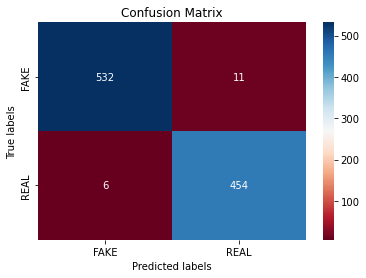

In [17]:
SVM_model = SVC(kernel = 'linear')

# Fitting  
SVM_model.fit(xv_train, y_train)

# Predicting  
SVM_y_pred = SVM_model.predict(xv_test)

# Calculating the accuracy 
score = accuracy_score(y_test, SVM_y_pred)
print('Accuracy of SVM model is: %0.4f ' % score)

# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, SVM_y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=plt.cm.RdBu)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
ax.yaxis.set_ticklabels(['FAKE', 'REAL']);

In [18]:
print(classification_report(y_test, SVM_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       543
           1       0.98      0.99      0.98       460

    accuracy                           0.98      1003
   macro avg       0.98      0.98      0.98      1003
weighted avg       0.98      0.98      0.98      1003



#### <span style='background :#10e2ee' > Logistic Regression </span>

Accuracy of LR model is: 0.9761 


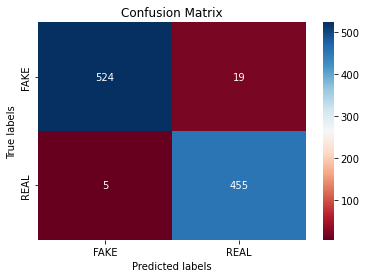

In [19]:
LR_model = LogisticRegression()

# Fitting 
LR_model.fit(xv_train, y_train)

# Predicting 
LR_y_pred = LR_model.predict(xv_test)

# Calculating the accurracy 
score = accuracy_score(y_test, LR_y_pred)
print('Accuracy of LR model is: %0.4f ' % score)

# plotting confusion matrix
cm = metrics.confusion_matrix(y_test, LR_y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=plt.cm.RdBu)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
ax.yaxis.set_ticklabels(['FAKE', 'REAL']);

In [20]:
print(classification_report(y_test, LR_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       543
           1       0.96      0.99      0.97       460

    accuracy                           0.98      1003
   macro avg       0.98      0.98      0.98      1003
weighted avg       0.98      0.98      0.98      1003



***

# <span style='background :#10e2ee' > Model Testing (SVM model) </span>

In [21]:
def fake_news_det(news):
    input_data = {'text':[news]}
    new_def_test = pd.DataFrame(input_data)
    new_def_test['text'] = new_def_test['text'].apply(cleaning) 
    new_x_test = new_def_test['text']
    vectorized_input_data = vect.transform(new_x_test)
    prediction = SVM_model.predict(vectorized_input_data)
    
    if prediction == 1:
        print(green('Not Fake News'))
    else:
        print(red('Fake News'))

In [22]:
print(black('Test 1 \n', ['bold']))
news = str(input())
print('\n')
fake_news_det(news)

Test 1 

"MEXICO CITY (Reuters) - Egypt’s Cheiron Holdings Limited won the rights to partner with Mexican national oil company Pemex on its onshore Cardenas-Mora project, the industry regulator said on Wednesday. The tie-up marks only the second joint venture between the Pemex and a equity partner since an energy opening finalized in 2014 ended the company’s decades-long monopoly and allowed it to develop projects with private and foreign oil companies. Cardenas-Mora is a 65-square-mile (168 sq km) field located in Tabasco state believed to contain 93 million barrels of oil equivalent (boe) in proven, probable and possible reserves."


Not Fake News


In [23]:
print(black('Test 2 \n', ['bold']))
news = str(input())
print('\n')
fake_news_det(news)

Test 2 

'Warning Something Big Is About to Happen in America the Martial Law Is Coming – 100% Chance it Will Happen ( Red List and Blue List)'


Fake News


In [24]:
print(black('Test 3 \n', ['bold']))
news = str(input())
print('\n')
fake_news_det(news)

Test 3 

"Just Shut Up & Play Some Damn Baseball!! (Before It's News) Look, plain and simple I am over this “Take a knee” bullshit in my opinion. Kyle Terada-USA TODAY Sports I’m not writing to debate with anyone on this. Everyone has a right to their own opinion and to protest….I get it. But I also have a right to turn on my television and watch America’s favorite pastime without the extra added political crap. It’s September and there are seven regular season games left so we have enough drama as it is. I like the drama involved in a heart racing, nail biting game between two good teams. It’s a beautiful game and an escape from reality (especially NOW) so can’t we just leave it at that? Baseball is my first passion, football is my second. Well, it was….it was the one other sport I really enjoyed when baseball was over. I have been a fan of a poor football team for years and stood by them but at this point it’s too much political mumbo jumbo for me to actually watch a game. Suddenly f

In [25]:
print(black('Test 4 \n', ['bold']))
news = str(input())
print('\n')
fake_news_det(news)

Test 4 

"Story highlights ""While we have made progress together, we know that violence and the abuse of power still persist today,"" Biden said Biden's statement on Weinstein comes after many other Democrats have come out and expressed their disapproval Washington (CNN) Six days after sexual harassment allegations were originally made against Harvey Weinstein, former Vice President Joe Biden expressed his disgust with the Hollywood executive and Democratic megadonor.Speaking at the Anti-Violence Project Courage Awards Wednesday night in New York City after being presented with a courage award for his work on behalf of the LGBTQ community, Biden, for the first time , addressed the situation with Weinstein, who has now been accused of sexual assault and rape as well as decades of predatory behavior.""While we have made progress together, we know that violence and the abuse of power still persist today,"" Biden said. ""We've recently seen that in stark relief in the disgusting conduct a

***